# Bayesian Neural Network Classification on IRIS dataset

In [ ]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Iris Data

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data
Y = iris.target 

In [31]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [30]:
x

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [33]:
#Train test split 
from sklearn.model_selection import train_test_split
X = x
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=41)

In [38]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [34]:
X_train.shape

torch.Size([120, 4])

In [35]:
X_test.shape

torch.Size([30, 4])

In [41]:
# Remove class 1 (out of classes 0, 1 and 2) from the train data 
X_train_filtered = X_train[y_train!=1]
X_train_filtered.shape

torch.Size([81, 4])

In [42]:
y_train_filtered = y_train[y_train!=1]
y_train_filtered.shape

torch.Size([81])

## 2. Define Model

In [118]:
# model = nn.Sequential(
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.5, in_features=4, out_features=8),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.5, in_features=8, out_features=9),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=1, in_features=9, out_features=3)
# )

model = nn.Sequential(
    nn.Linear(in_features=4, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=9),
    nn.ReLU(),
    nn.Linear(in_features=9, out_features=3)
)

In [119]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

optimizer = optim.Adam(model.parameters(), lr=0.01)

## 3. Train Model

In [ ]:
kl_weight = 0.0
filter_train = False

In [122]:
#Train the model only on classes 0 and 2
for step in range(3000):
    pre = model(X_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y_train.size(0)
correct = (predicted == y_train).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 100.000000 %
- CE : 0.00, KL : 0.00


In [123]:
for name, parameter in model.state_dict().items():
    print(name, parameter)

0.weight tensor([[-0.2525, -0.1950,  0.2696,  0.0260],
        [-0.0689, -0.1576, -0.7080, -0.6731],
        [-0.2594,  0.4185, -0.4825, -0.0513],
        [ 0.3598, -0.2508,  1.0308,  1.2364],
        [ 0.0680, -0.0781, -0.5002, -0.0210],
        [ 0.0039, -0.0609, -0.0455,  0.1205],
        [ 0.5498,  1.1914, -0.9266, -2.2827],
        [-0.3269, -0.7339,  0.7844,  1.7191]])
0.bias tensor([ 0.4471,  0.4178, -0.4209, -0.8103, -0.1197, -0.6919,  2.5408, -2.4197])
2.weight tensor([[ 1.4378e-01,  5.9457e-01, -9.8407e-02, -4.4131e-01, -2.2473e-01,
         -2.3250e-01,  3.4466e+00, -3.8154e+00],
        [-4.8422e-02,  3.4354e-01, -1.3934e-01, -8.8973e-01,  2.1324e-01,
         -1.7783e-01,  2.0284e+00, -7.2638e-01],
        [ 5.7522e-02, -1.4519e-01, -2.5984e-01, -3.0796e-02,  2.7233e-01,
          1.0703e-01, -3.0436e-01, -3.1306e-01],
        [-3.4683e-01, -3.8528e-01, -1.2821e-01, -1.3772e-01,  3.5216e-01,
         -2.0266e-01, -2.1372e-01, -5.9965e-02],
        [ 9.9056e-02,  4.8852e-02

## 4. Test Model

In [89]:
# Sample 10k models and store the results
n_models = 10000
models_result = [model(X_test) for k in range(n_models)]

In [90]:
models_result[0][0].argmax().item()

2

In [91]:
results = np.zeros((n_models, 30))     # num. of models, number of test datapoints
for i in range(n_models):
    for j in range(30):
        results[i][j] = models_result[i][j].argmax().item()

In [99]:
np.argwhere(y_test==1)

tensor([[ 3,  5,  7, 13, 17, 20, 24, 25, 26, 27, 29]])

In [97]:
results[:,0]

array([2., 2., 2., ..., 2., 2., 2.])

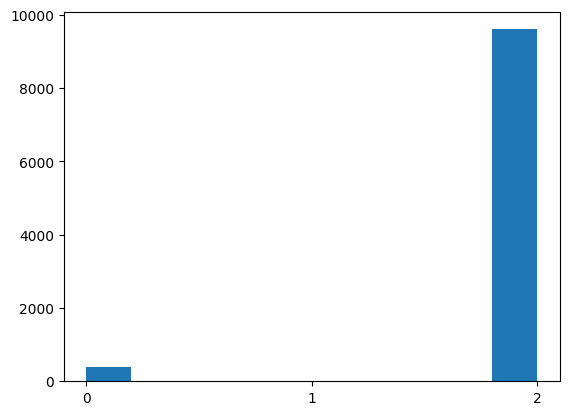

In [109]:
# Plotting histogram 
plt.hist(results[:,13])
plt.xticks([0,1,2])
plt.show()

In [11]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

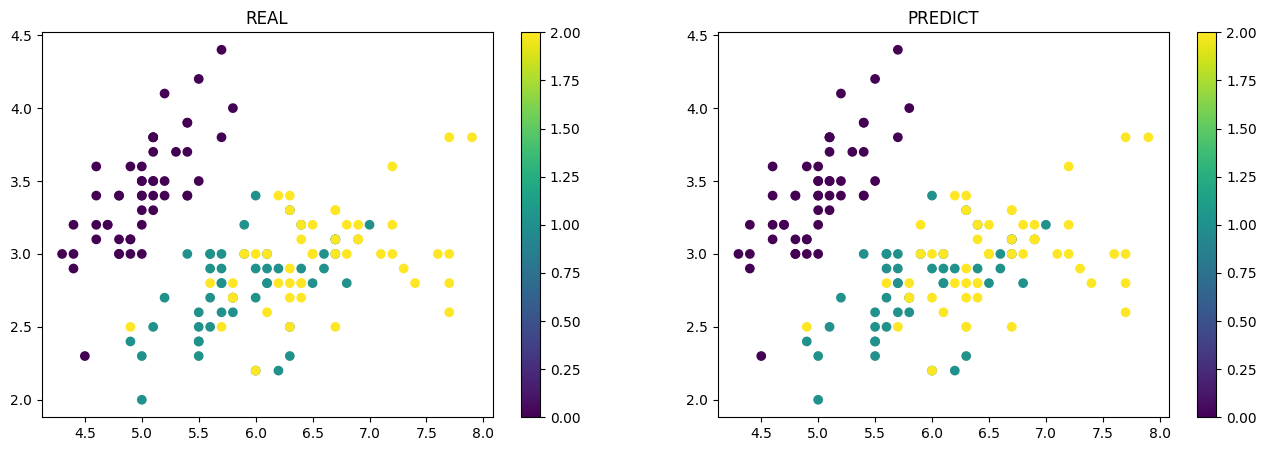

In [12]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

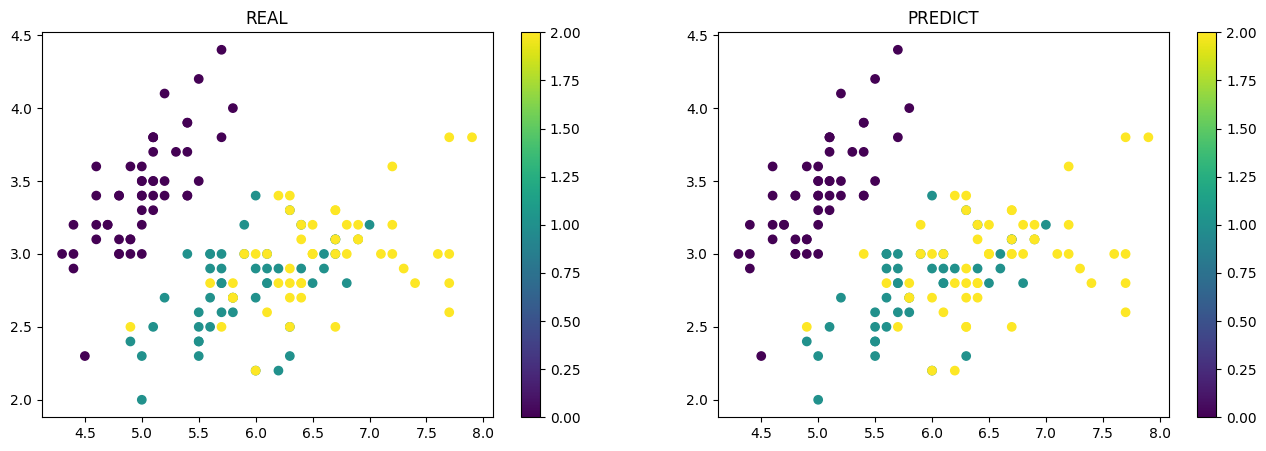

In [27]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

In [ ]:
bnn.